# Web Scrapping

**Documentación**

https://beautiful-soup-4.readthedocs.io/en/latest/

# Librerías

In [52]:
from bs4 import BeautifulSoup #BeautifulSoup versión 4
import lxml #HTML parser (Analizador sintáctico HTML)
import html5lib #Otro HTML parser (hay varios).
import requests #Librería para capturar el contenido de páginas web

# Pasos

    1. Capturar el contenido de la página web con la librería requests: url_contents=requests.get("url").text
    
    2. Se le pasa la captura a BeautifulSoup que interpreta el HTML capturado con un parser:
    
        soup=BeautifulSoup(content,'lxml')
        
    3. Inspeccionar en la página web los elementos que se desean capturar.
        
        La página HTML tiene una serie de tags que tienen estructura y jerarquía. Se necesita copiar los tags deseados para capturar los elementos correctos desde BeautifulSoup.
        
    4. Usar método elemento=soup.find('tag','<otras condiciones de búsqueda>') para capturar el elmento deseado.
    
    5. Utilizar el elemento o elementos capturado/s para el procesamiento que se desee.
        
        
    

# Captura de páginas web

In [53]:
import requests
link="https://www.elpais.es"
contents=requests.get(link).text
print(contents)

<!DOCTYPE html><html lang="es"><head><link rel="icon" type="image/x-icon" href="https://static.elpais.com/dist/resources/images/favicon.ico"/><title>EL PAÍS: el periódico global</title><meta name="lang" content="es"/><meta name="author" content="Ediciones El País"/><meta name="robots" content="index,follow"/><meta name="description" content="Noticias de última hora sobre la actualidad en España y el mundo: política, economía, deportes, cultura, sociedad, tecnología, gente, opinión, viajes, moda, televisión, los blogs y las firmas de EL PAÍS. Además especiales, vídeos, fotos, audios, gráficos, entrevistas, promociones y todos los servicios de EL PAÍS."/><meta http-equiv="Refresh" content="900"/><meta name="organization" content="Ediciones EL PAÍS S.L."/><meta property="article:publisher" content="https://www.facebook.com/elpais/"/><meta property="og:title" content="EL PAÍS: el periódico global"/><meta property="og:description" content="Noticias de última hora sobre la actualidad en Espa

# Haciendo la sopa con BeautifulSoup

Se le pasa el contenido de una página web a una instancia BeautifulSoup. También se le pasa un parser para interpretar el html (si no se le pasa un parser BeautifulSoup utiliza uno por defecto).

In [60]:
soup=BeautifulSoup(contents,'html5lib')
soup

<!DOCTYPE html>
<html lang="es"><head><link href="https://static.elpais.com/dist/resources/images/favicon.ico" rel="icon" type="image/x-icon"/><title>EL PAÍS: el periódico global</title><meta content="es" name="lang"/><meta content="Ediciones El País" name="author"/><meta content="index,follow" name="robots"/><meta content="Noticias de última hora sobre la actualidad en España y el mundo: política, economía, deportes, cultura, sociedad, tecnología, gente, opinión, viajes, moda, televisión, los blogs y las firmas de EL PAÍS. Además especiales, vídeos, fotos, audios, gráficos, entrevistas, promociones y todos los servicios de EL PAÍS." name="description"/><meta content="900" http-equiv="Refresh"/><meta content="Ediciones EL PAÍS S.L." name="organization"/><meta content="https://www.facebook.com/elpais/" property="article:publisher"/><meta content="EL PAÍS: el periódico global" property="og:title"/><meta content="Noticias de última hora sobre la actualidad en España y el mundo: política, 

# Inspeccionar la página web y copiar los tags que se quieren capturar

Se selecciona el elemento deseado en la página web.

Se saca la pantalla de inspección de código HTML.

Se copia el tag del elemento en dicha ventana.

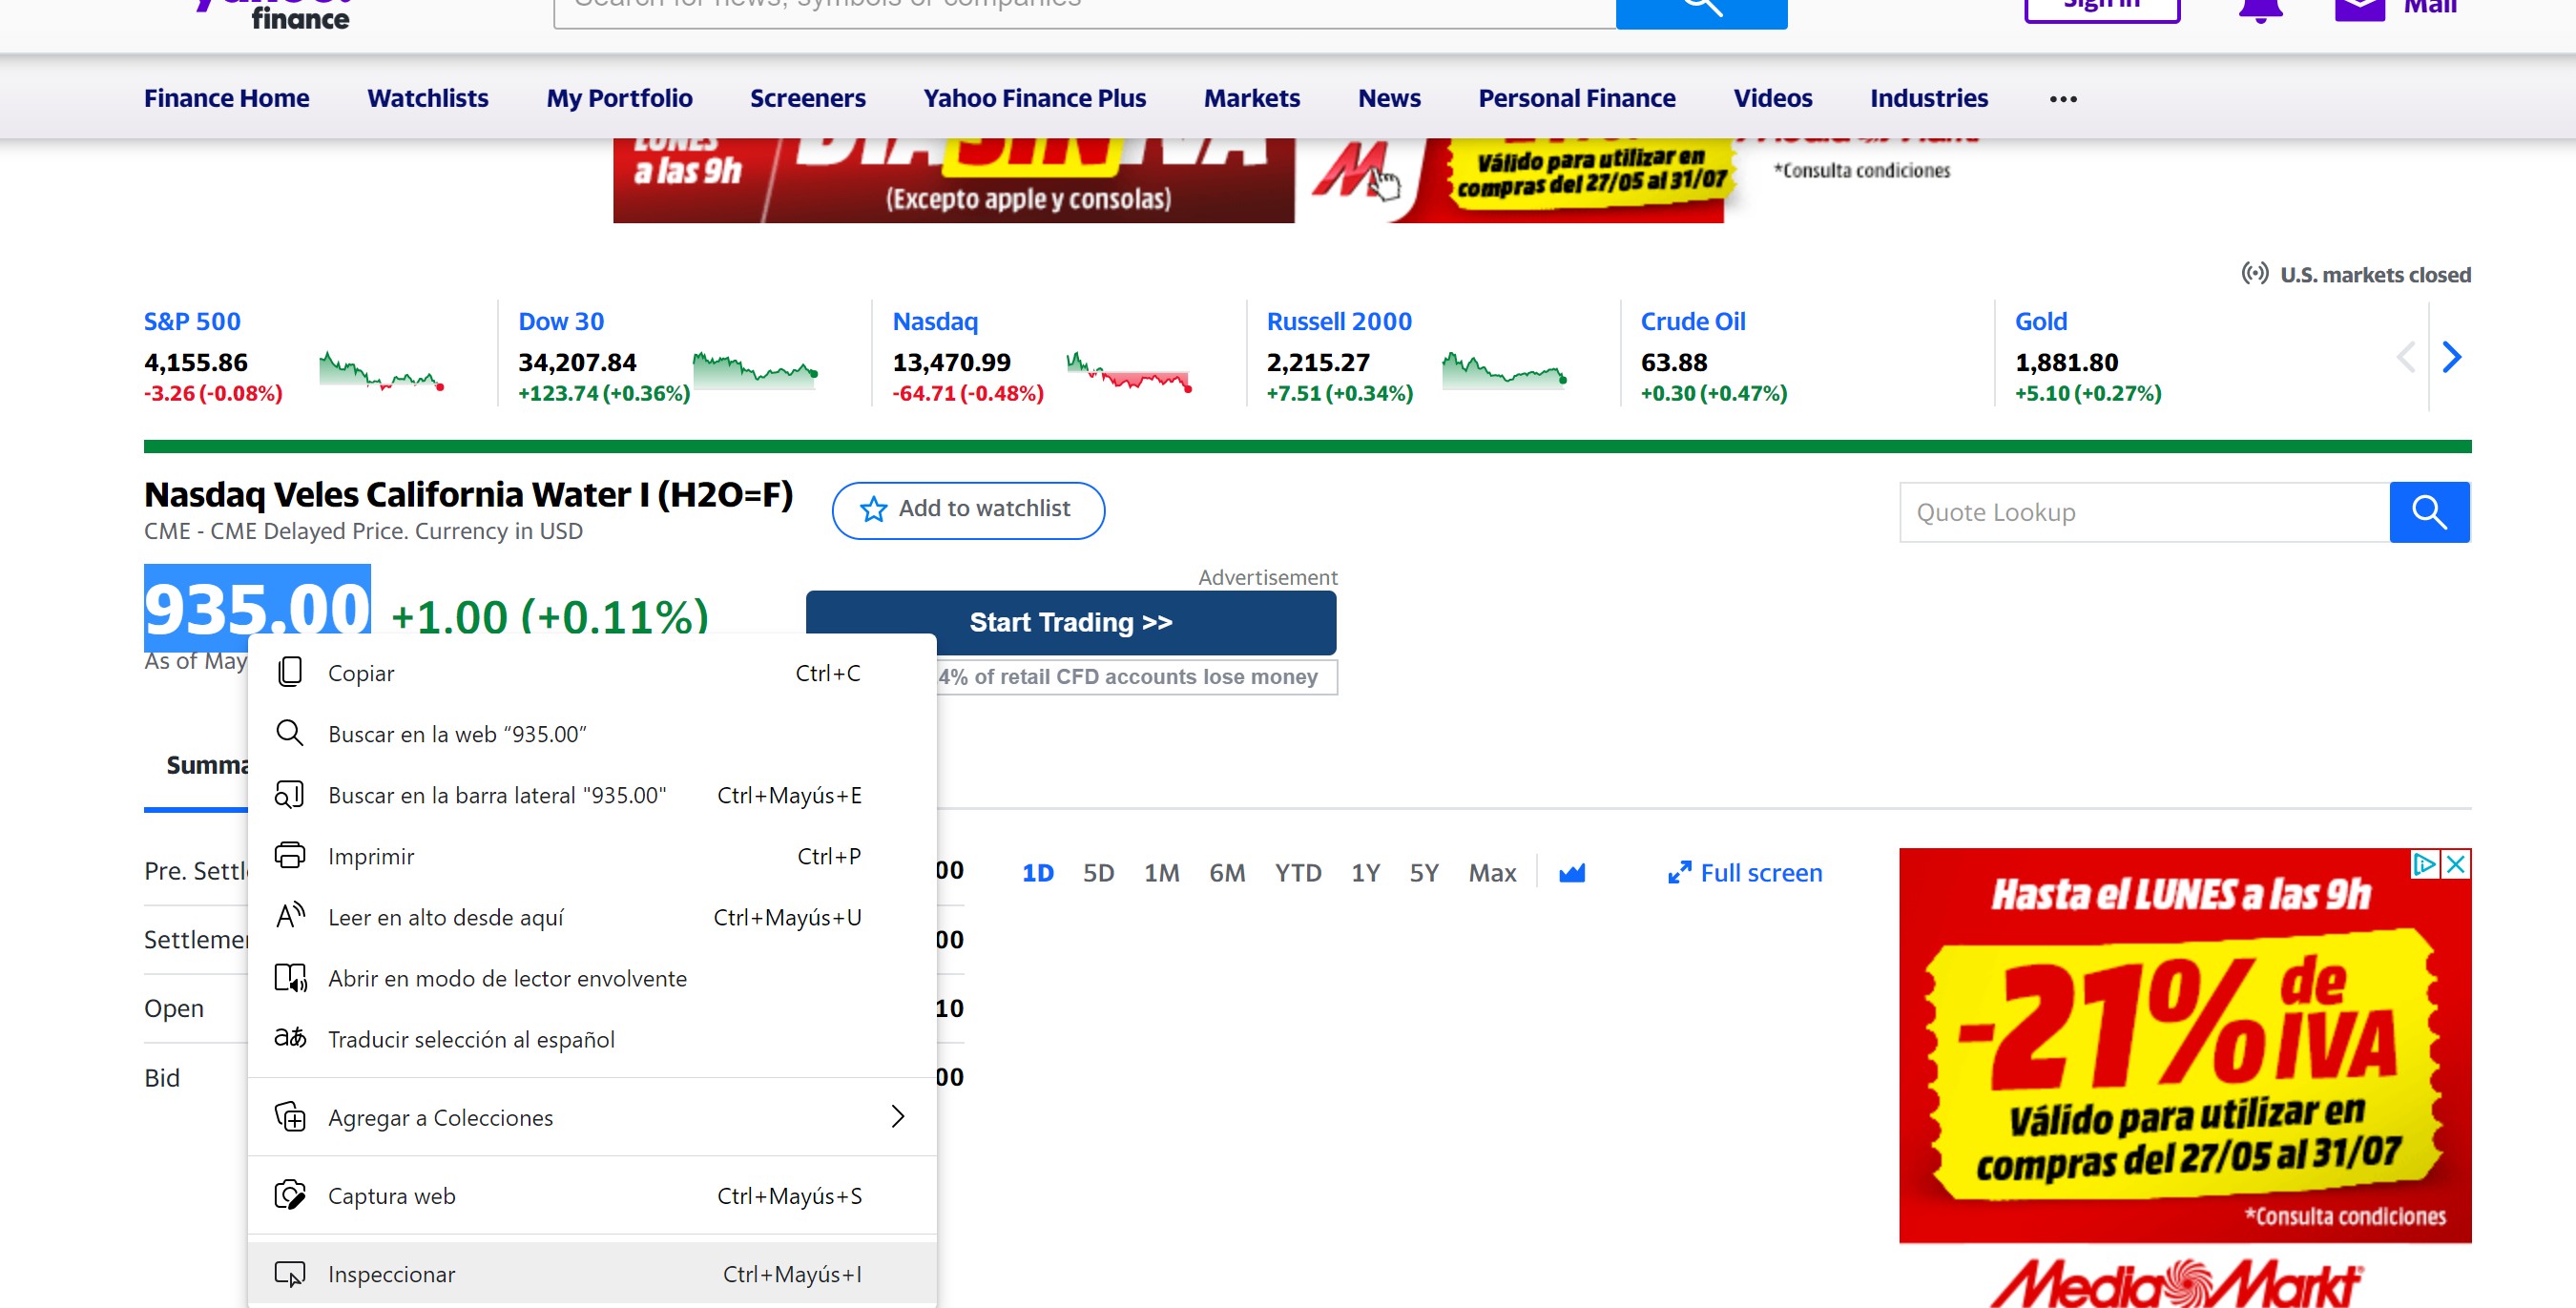

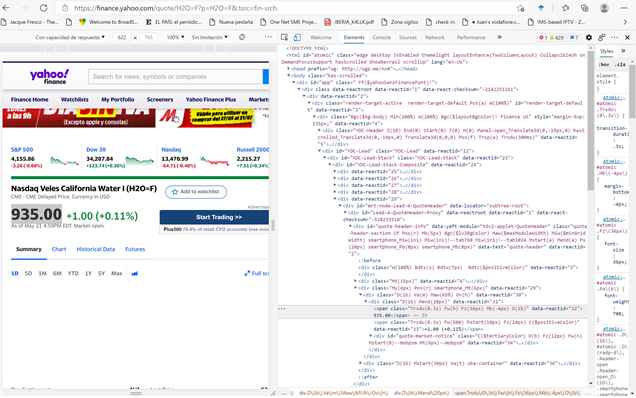

# Inspeccionar en la sopa los tags deseados

In [63]:
'''
El tag de la cotización de un activo financiero en la web de yahoo es
<span class="Trsdu(0.3s) Fw(b) Fz(36px) Mb(-4px) D(ib)">9,204.00</span>
En este caso 9,204.00 es la cotización que buscamos capturar.
'''



link="https://finance.yahoo.com/quote/%5EIBEX?p=^IBEX&.tsrc=fin-srch" #Cotización del Ibex35 en la web de yahoo Finance
contents=requests.get(link).text
soup=BeautifulSoup(contents)

'''
Ponemos una doble condición al método find:

- El tag a capturar es de tipo 'span'

- La clase dentro del tag="Trsdu(0.3s) Fw(b) Fz(36px) Mb(-4px) D(ib)"

'''

cotizacion=soup.find('span',class_="Trsdu(0.3s) Fw(b) Fz(36px) Mb(-4px) D(ib)").text
print('Cotización capturada con webscrapping:',cotizacion)

Cotización: 9,204.00


# Práctica de web scrapping

1. Escribe el código para una aplicación que pida por pantalla el código Yahoo de un stock market que desee el usuario.

2. El código de stock introducido por el usuario es capturado.

3. Capturar el contenido de la URL correspondiente al código introducido.

4. Capturar e imprimir dos elementos:

    4.1 La cotización
    
    4.2 Resumen de la cuantía de dicha cotización en términos de subida/baja porcentual respecto al valor anterior.
    

Guia: 

    - Usa el siguiente código para pedir y capturar una entrada de usuario:
    
        entrada=input('Mete el id del stock que quieras consultar') para 
        
    - En la web de yahoo cada stock tiene su propio código, usa dicho código para indicar el stock que se quiere visualizar:
    

    
    
    

 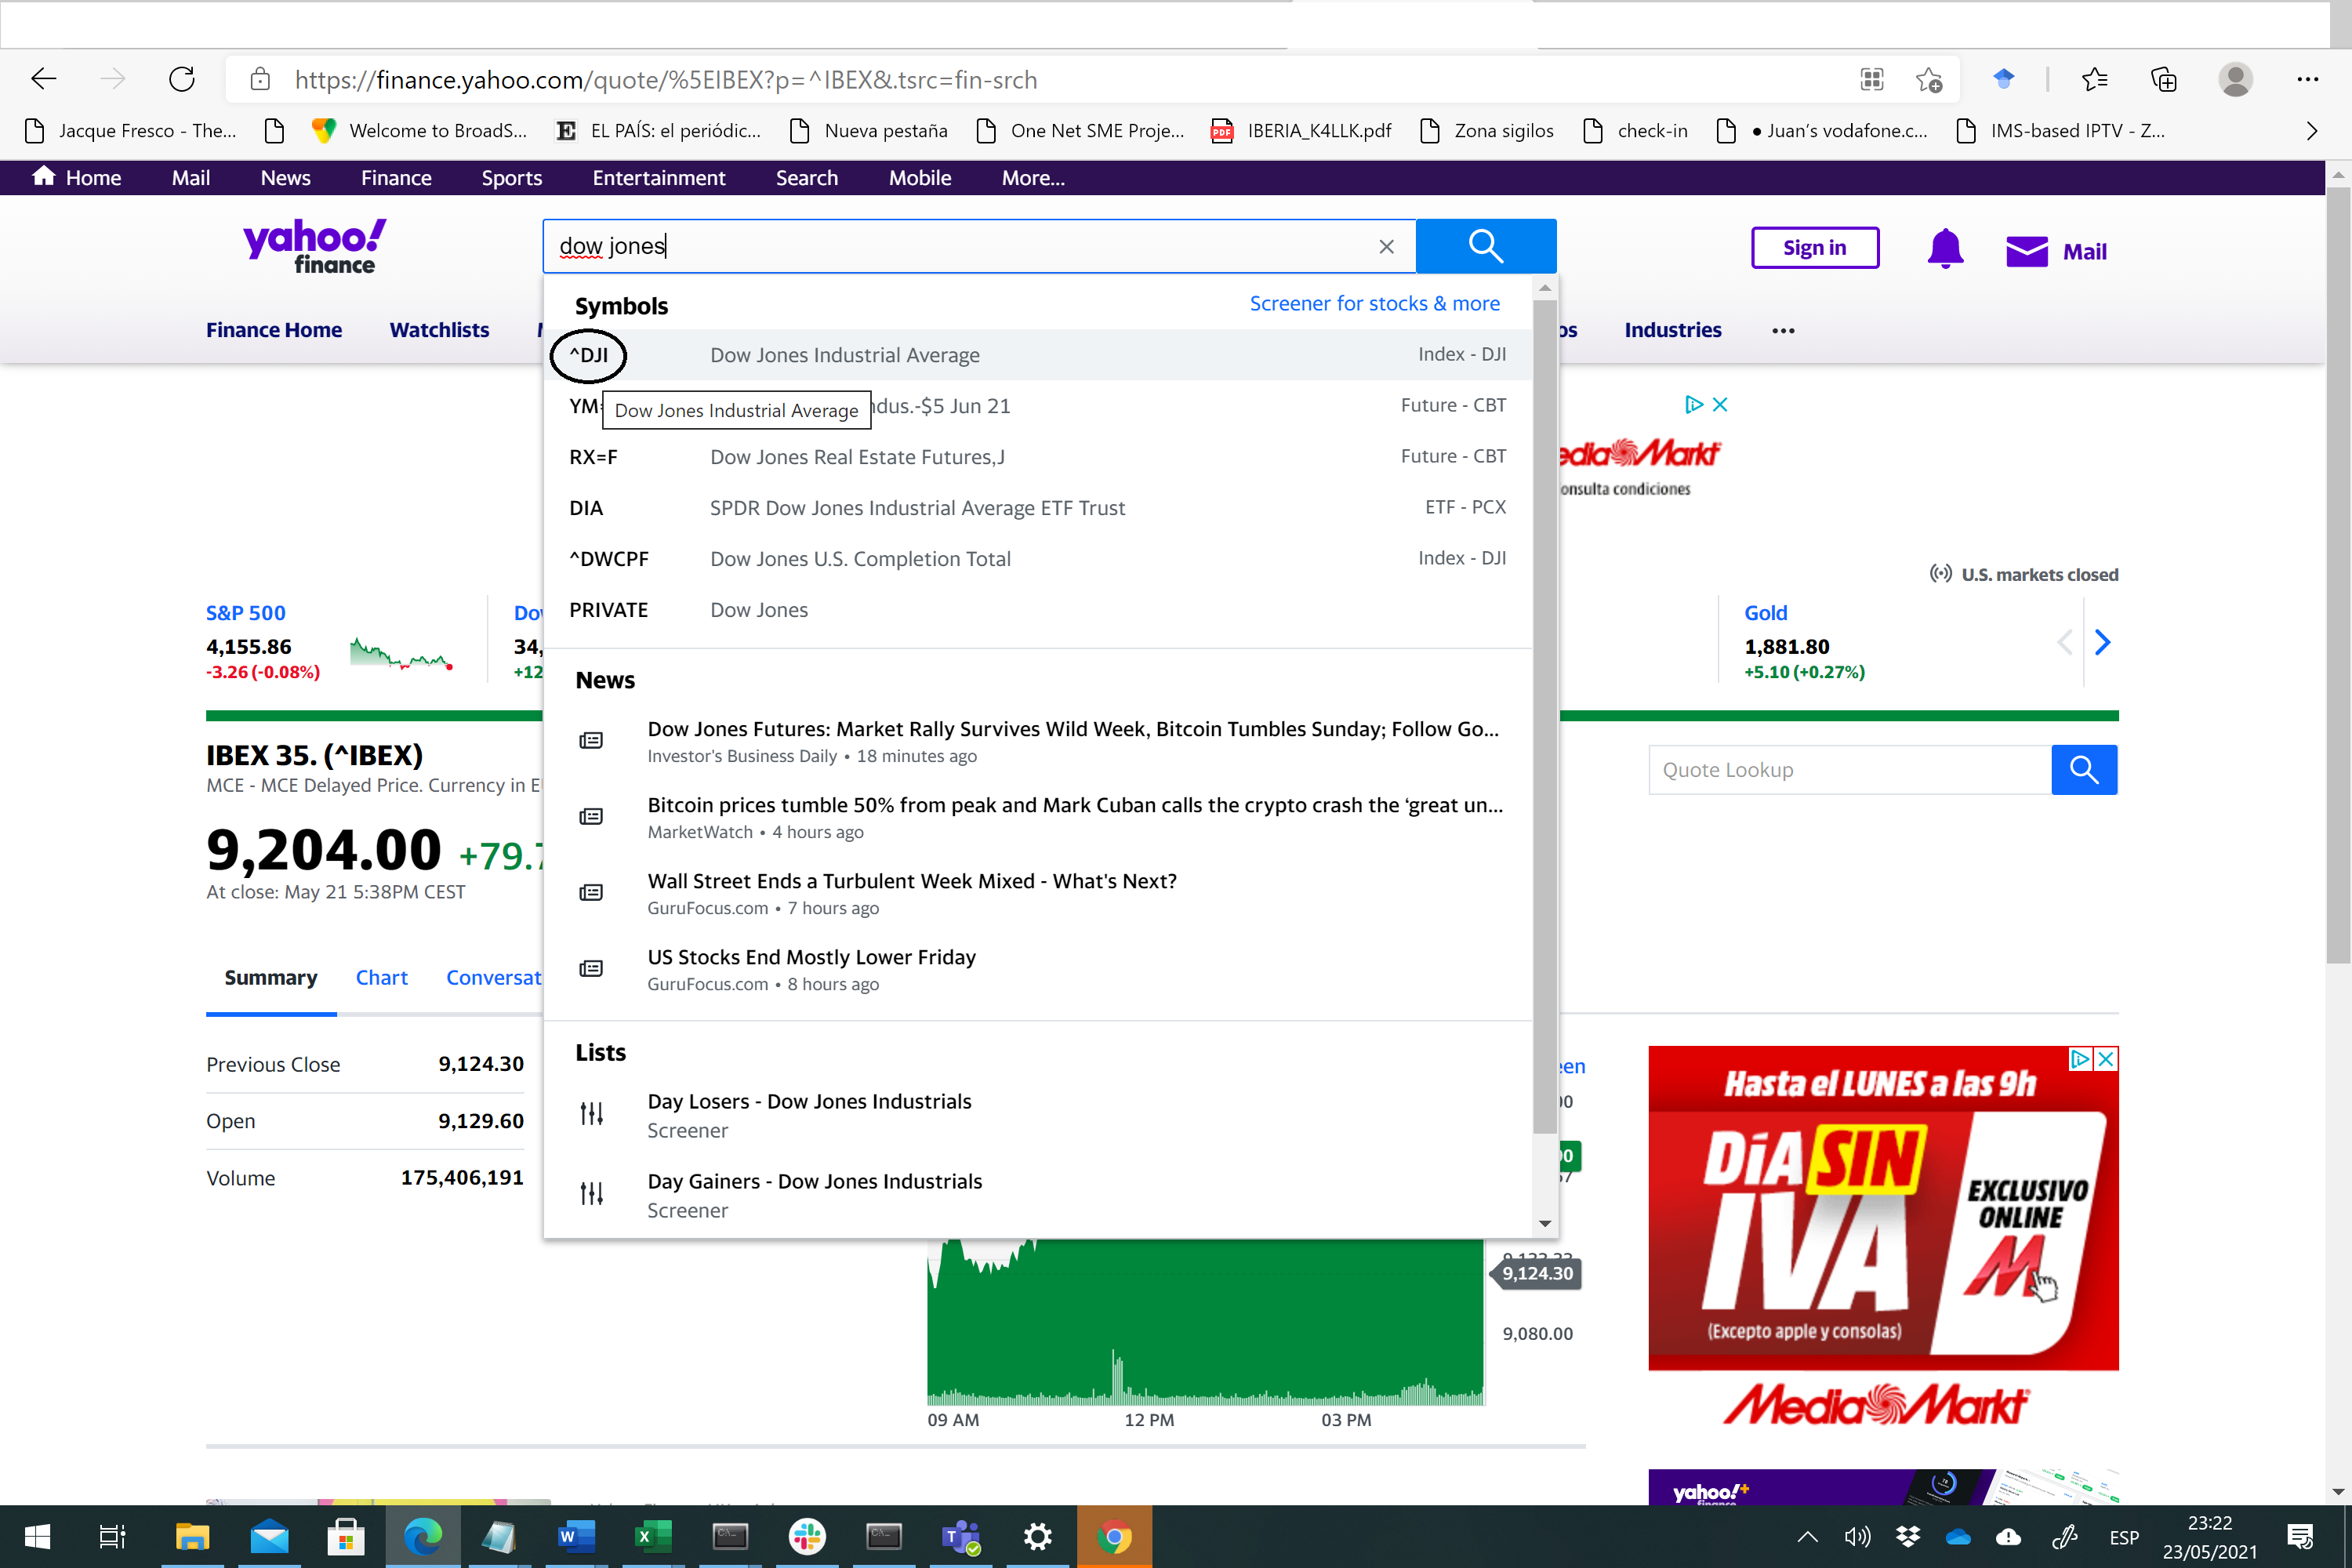

# Práctica: Solución

In [64]:
entrada=input('Mete el id del stock que quieras consultar') # SE PIDE Y SE CAPTURA EL CÓDIGO DEL STOCK


#LA URL SIEMPRE TIENE EL FORMATO https://finance.yahoo.com/quote/ SEGUIDO DEL CÓDIGO DEL STOCK Y SEGUIDO DE ?p=NQ=F&.tsrc=fin-srch
#LA FORMA DE UNIR DOS TROZOS DE STRING ES STRING1 + STRING2
link="https://finance.yahoo.com/quote/"+entrada+"?p=NQ=F&.tsrc=fin-srch" 

contents=requests.get(link).text #SE CAPTURA LA URL
soup=BeautifulSoup(contents) #SE INTRODUCE LA URL EN LA INSTANCIA SOUP

'''
El tag de la cotización tiene esta forma:

<span class="Trsdu(0.3s) Fw(b) Fz(36px) Mb(-4px) D(ib)">9,204.00</span>
'''

cotización=soup.find('span',class_="Trsdu(0.3s) Fw(b) Fz(36px) Mb(-4px) D(ib)").text #SE BUSCA EL TAG DENTRO DE SOUP
print('Cotización:',cotización) #SE PRINTA EL RESULTADO

'''
El tag para la variación porcentual es:
<span class="Trsdu(0.3s) Fw(500) Pstart(10px) Fz(24px) C($positiveColor)">+79.70 (+0.87%)</span>

'''


variacion=soup.find('span',class_="Trsdu(0.3s) Fw(500) Pstart(10px) Fz(24px) C($positiveColor)").text #Se busca en soup el tag
print('Variación:',variacion) #Se printa la variación



Mete el id del stock que quieras consultar^DJI
Cotización: 34,207.84
Resumen: +123.74 (+0.36%)


In [17]:
from webdriver_manager.chrome import ChromeDriverManager
from selenium import webdriver
from bs4 import BeautifulSoup
link="https://www.elpais.es"
link="https://www.oddsportal.com/tennis/switzerland/atp-geneva/ruud-casper-koepfer-dominik-fqwNscq3/inplay-odds/"

driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get(link)
soup = BeautifulSoup(link, 'html.parser')


[WDM] - Current google-chrome version is 90.0.4430
[WDM] - Get LATEST driver version for 90.0.4430
[WDM] - Driver [C:\Users\juanh\.wdm\drivers\chromedriver\win32\90.0.4430.24\chromedriver.exe] found in cache


In [19]:
html_doc = """
<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>

<p class="story">Once upon a time there were three little sisters; and their names were
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>

<p class="story">...</p>
"""
soup = BeautifulSoup(html_doc, 'html.parser')
print(soup.prettify())


<html>
 <head>
  <title>
   The Dormouse's story
  </title>
 </head>
 <body>
  <p class="title">
   <b>
    The Dormouse's story
   </b>
  </p>
  <p class="story">
   Once upon a time there were three little sisters; and their names were
   <a class="sister" href="http://example.com/elsie" id="link1">
    Elsie
   </a>
   ,
   <a class="sister" href="http://example.com/lacie" id="link2">
    Lacie
   </a>
   and
   <a class="sister" href="http://example.com/tillie" id="link3">
    Tillie
   </a>
   ;
and they lived at the bottom of a well.
  </p>
  <p class="story">
   ...
  </p>
 </body>
</html>


In [30]:
print(soup.title)

print()
print(soup.title.name)

print()
print(soup.title.string)

print()
print(soup.title.parent.name)

print()
print(soup.p)


print()
print(soup.p['class'])


print()
print(soup.a)


print()
print(soup.find_all('a'))

print()
print(soup.find(id="link3"))


<title>The Dormouse's story</title>

title

The Dormouse's story

head

<p class="title"><b>The Dormouse's story</b></p>

['title']

<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>, <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>, <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>


In [19]:
from webdriver_manager.chrome import ChromeDriverManager
from selenium import webdriver
from bs4 import BeautifulSoup
import lxml
import html5lib
import requests
driver = webdriver.Chrome(ChromeDriverManager().install())
link="https://www.oddsportal.com/soccer/aruba/division-di-honor/racing-club-aruba-britannia-CxB8ZO7t/"
driver.get(link)
content = driver.page_source
soup = BeautifulSoup(content,'lxml')




[WDM] - Current google-chrome version is 90.0.4430
[WDM] - Get LATEST driver version for 90.0.4430
[WDM] - Driver [C:\Users\juanh\.wdm\drivers\chromedriver\win32\90.0.4430.24\chromedriver.exe] found in cache


In [14]:
soup.prettify()

'<html xml:lang="cs" xmlns="http://www.w3.org/1999/xhtml">\n <head>\n  <script async="" crossorigin="anonymous" src="https://connect.facebook.net/en_US/all.js?hash=ba2ac58e155e8a42e084091e5dd2dbca&amp;ua=modern_es6">\n  </script>\n  <script async="" id="facebook-jssdk" src="//connect.facebook.net/en_US/all.js#xfbml=1&amp;appId=393736670647047">\n  </script>\n  <script async="" src="https://www.google-analytics.com/analytics.js" type="text/javascript">\n  </script>\n  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>\n  <meta content="Thu, 01 Jan 1970 00:59:59 GMT" http-equiv="expires"/>\n  <meta content="no-cache" http-equiv="pragma"/>\n  <meta content="no-cache" http-equiv="cache-control"/>\n  <meta content="sport" property="og:type"/>\n  <meta content="https://www.oddsportal.com/res/img/oddsportal.png" property="og:image"/>\n  <meta content="Oddsportal.com" property="og:site_name"/>\n  <link href="https://www.oddsportal.com/res/img/oddsportal.png" rel="image_src"/>

In [40]:
# FROM TUTORIAL
from bs4 import BeautifulSoup
import lxml
import requests
content=requests.get(link).text
soup=BeautifulSoup(content,'lxml')
#print(soup.prettify())
titulo=soup.title.text #soup.<tag>.tag_attribute FINDS THE FIRST TAG MATCHING
quotes=soup.find_all('td',class_='name',text='Average') #ALSO FINDS THE FIRST OCURRENCE
#<tr class="aver"><td class="name"><strong>Average</strong></td><td class="right">1.31</td><td class="right">5.05</td><td class="right">7.39</td><td class=" center no-border-right-average">91.3%</td><td class="check"></td></tr>
print()
print(quotes.child)
selector=soup.odds-data-table.div.table.tfoot.tr.aver.td:nth-child(2)
print(selector)

#<td class="right">1.31</td>
#<div onmouseout="delayHideTip()" onmouseover="page.hist(this,'P-0.00-0-0','4pv03xv498x0x0',581,event,0,1)">5.40</div>
#<td class="right">1.31</td>
find encuentra la primera ocurrencia
find_all encuentra todas las ocurrencias que cumplen las condiciones

for element in soup.find_all('td',class_='name'):
    print()

SyntaxError: invalid syntax (<ipython-input-40-847e94230b77>, line 12)

In [43]:
content=requests.get(link).text
content

'\n        <!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">\n        <html xmlns="http://www.w3.org/1999/xhtml" xml:lang="cs">\n            <head>\n\t\t        <meta http-equiv="content-type" content="text/html; charset=utf-8" />\n\t\t        <meta http-equiv="expires" content="86400" />\n\t\t        <meta name="description" content="" />\n\t\t        <meta name="keywords" content="" />\n\t\t        <title>OddsPortal: Page not found</title>\n\t\t        <style type="text/css" media="screen,projection">\n\t\t\t\t\tbody {background: url("data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAAQAAAAEAgMAAADUn3btAAAADFBMVEUqKiokJCQbGxsfHx/MYYG6AAAAGUlEQVR4XgXAgRAAAAwCwDeY3/zyC6FzXmUFqAH/YS8jCAAAAABJRU5ErkJggg%3D%3D") repeat scroll 0 0 #2A2A2A;font-family: Tahoma,Verdana,Arial;}body {background-color: #000000;}body {   color: #333333;font-size: 75%;margin: 0;padding: 0;}.wrap {padding-top: 1px;}           #mother {margin: 0 auto 25px;padd

In [65]:
primer_a=soup.find('a')
a_all=soup.find_all('a')
print(primer_a)
print()
print(a_all)

<a accesskey="2" href="#col-content" title="Proceed to content (Keyboard shortcut: Alt + 2)">Proceed to content</a>

[<a accesskey="2" href="#col-content" title="Proceed to content (Keyboard shortcut: Alt + 2)">Proceed to content</a>, <a href="#main-menu">Proceed to main menu</a>, <a href="#search-box">Proceed to search</a>, <a href="/">
<img alt="ODDS Portal" height="39" src="/img/logo-odds-portal.png" width="263"/>
</a>, <a class="user-header-fakeselect" id="user-header-oddsformat-expander" onclick="ElementSelect.expand( 'user-header-oddsformat' , 'user-header-oddsformat-expander' )"><span>EU Odds</span></a>, <a href="#" onclick="changeOddsFormat(1); return false;"><span>EU Odds</span></a>, <a href="#" onclick="changeOddsFormat(2); return false;"><span>UK Odds</span></a>, <a href="#" onclick="changeOddsFormat(3); return false;"><span>US Odds</span></a>, <a href="#" onclick="changeOddsFormat(4); return false;"><span>HK Odds</span></a>, <a href="#" onclick="changeOddsFormat(5); return 

In [39]:
soup.prettify()

'<html xml:lang="cs" xmlns="http://www.w3.org/1999/xhtml">\n <head>\n  <script async="" crossorigin="anonymous" src="https://connect.facebook.net/en_US/all.js?hash=ba2ac58e155e8a42e084091e5dd2dbca&amp;ua=modern_es6">\n  </script>\n  <script async="" id="facebook-jssdk" src="//connect.facebook.net/en_US/all.js#xfbml=1&amp;appId=393736670647047">\n  </script>\n  <script async="" src="https://www.google-analytics.com/analytics.js" type="text/javascript">\n  </script>\n  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>\n  <meta content="Thu, 01 Jan 1970 00:59:59 GMT" http-equiv="expires"/>\n  <meta content="no-cache" http-equiv="pragma"/>\n  <meta content="no-cache" http-equiv="cache-control"/>\n  <meta content="sport" property="og:type"/>\n  <meta content="https://www.oddsportal.com/res/img/oddsportal.png" property="og:image"/>\n  <meta content="Oddsportal.com" property="og:site_name"/>\n  <link href="https://www.oddsportal.com/res/img/oddsportal.png" rel="image_src"/>

In [45]:
soup.find_all('link')


[<link href="https://www.oddsportal.com/res/img/oddsportal.png" rel="image_src"/>,
 <link alt="Iphone icon" href="/res/img/apple-touch-icon.png" rel="apple-touch-icon"/>,
 <link alt="Ipad icon" href="/res/img/apple-touch-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>,
 <link alt="Iphone, Ipad Hi icon" href="/res/img/apple-touch-icon-114x114.png" rel="apple-touch-icon" sizes="114x114"/>,
 <link href="/favicon.ico" rel="shortcut icon"/>,
 <link href="https://www.oddsportal.com/tennis/switzerland/atp-geneva/ruud-casper-koepfer-dominik-fqwNscq3/inplay-odds/" rel="canonical"/>,
 <link href="/res/x/advert-210519121818.css" media="screen, projection" rel="Stylesheet" type="text/css"/>,
 <link href="/res/x/global-210519121818.css" media="screen, projection" rel="Stylesheet" type="text/css"/>,
 <link href="/res/x/bookmakers-210519121818-1621538857.css" media="screen, projection" rel="Stylesheet" type="text/css"/>]

In [47]:
soup.get_text('365')

"\n365\n365\n365\n365\n365\n365\n365\n365\n365\n365\n365\n365\n365\n365\n365\n365\n365\n365\n365\n365\n365\n365IN-PLAY ODDS: Ruud C. - Koepfer D. Tennis ATP Geneva (clay) Betting Odds365\n365\n365\n365\n365\n365\n365\n365\n365\n365\n365\n365\n365\n365\n365\n365\n365\n365\n365\n365\n365\n365\n365\n365\n365\n365\n365\n365\n365advertisement365\n365\n365Proceed to content365\n\t\t\xa0|\xa0\n\t\t365Proceed to main menu365\n\t\t\xa0|\xa0\n\t\t365Proceed to search365\n365\n365\n365\n365\n365\n365\n365\n365\n365\n365\n365\n365\n365\n365EU Odds365\n365\n365EU Odds365\n365UK Odds365\n365US Odds365\n365HK Odds365\n365MA Odds365\n365IN Odds365\n365\n365\n365Time:365\n365\n36523 May 16:18, GMT 0365\n365\n365Login365REGISTER365\n365\n365\n365\n365\n365Main menu365\n365\n365\n365\n365Odds Comparison365\n365\n365Home365Next Matches365Dropping Odds365Sure Bets365In-Play Odds365All Events365Blocked Odds365Value Bets365Hot Matches365Best Handicaps365Moving Margins365Archived Results365Standings365Betting

Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. But you’ll only ever have to deal with about four kinds of objects: Tag, NavigableString, BeautifulSoup, and Comment.

In [ ]:
tutorials
https://www.makeuseof.com/beautiful-soup-tutorial/
https://youtu.be/4UcqECQe5Kc

In [18]:
link="https://www.elpais.es"
driver.get(link)
content = driver.page_source
soup = BeautifulSoup(content)
print(soup.prettyfy)

None


In [11]:
print(soup.title)
print()
print(soup.title.name)
print()
print(soup.title.string)
print()

<title>IN-PLAY ODDS: De Jong J. - Cuevas M. Tennis ITF M25 Jablonec Nad Nisou Men (clay) Betting Odds</title>

title

IN-PLAY ODDS: De Jong J. - Cuevas M. Tennis ITF M25 Jablonec Nad Nisou Men (clay) Betting Odds



In [ ]:
def get_odds(link,odd_type,driver,threshold): 
    '''
    This function gets the average or max 1X2 odds from oddsportal. 
    
    
    param:
    'link':the link in oddsportal for the game
    'odd_type': if 'aver' averaged is calculated.If 'highest' max is calculated
    'threshold':the threshold in days to consider the game is under our radar
    'driver': browser driver.
    '''
    
    from selenium import webdriver
    from webdriver_manager.chrome import ChromeDriverManager
    from bs4 import BeautifulSoup
    import pandas as pd
    import time

    ### Managing the chrome driver automatically
    #driver = webdriver.Chrome(ChromeDriverManager().install())
    q1=0
    q2=0
    q3=0
    error=0
    game=''
    try:
        
        driver.get(link)
        content = driver.page_source
        soup = BeautifulSoup(content)
        

        for a in soup.findAll('h1'):
            game=a.text

        flag_bet=1
        for a in soup.findAll('div'):
            entry_pre=a.find('tr',attrs={'class':odd_type}) 
            
            for b in entry_pre.findAll('td',attrs={'class':'right'}):
                entry=b.text
                
                #print(entry)
                
                if flag_bet==1:
                                  
                    #if entry!=None:
                    q1=float(entry)
                    
                    flag_bet=3

                elif flag_bet==3:
                    
                    #if entry!=None:
                    q3=float(entry)
                    
                    flag_bet=2
                else:
                    #if entry!=None:
                    q2=float(entry)
                    
                    #break # Para no entrar más porque he acabado
                
    except:
        
        pass



   
    #Error control
    if q1==0 or q2==0 or q3==0:
        #print('Not available odds for ',game,'in the booker',booker)
        error=1 #It is a flag so that the model does not try anything with the ouput of this function
    
    #We check the time constrain
    out=date_constrain(link,driver,threshold)
    constrain=out[0]
    date=out[1]
    constrain=0
    if constrain==1:
        q1=0
        q2=0
        q3=0
        error=1
    return [q1,q3,q2,game,error,date]

In [ ]:
def get_booker_odds(link,booker,driver,threshold): 
    '''
    This function gets the odds for the booker from oddsportal. 
    Notice that the bookmakers to be entered here should not require
    log into the page before showing the quotes for these bookmakers.
    If the latter were the case then we need to use the function
    get_betfair_odds(link,threshold,driver) 
    (specific for betfair and betfair exchange although it can be
    modified for other bookmakers requiring login)
    
    param:
    'link':the link in oddsportal for the game
    'threshold':the threshold in days to consider the game is under our radar
    'booker': The booker we are requesting the odds for
    'driver': browser driver.
    '''
    
    #driver.get("https://www.oddsportal.com/soccer/germany/bundesliga/hertha-berlin-eintracht-frankfurt-bDVlzthl/?r=1")
    from selenium import webdriver
    from webdriver_manager.chrome import ChromeDriverManager
    from bs4 import BeautifulSoup
    import pandas as pd
    import time

    ### Managing the chrome driver automatically
    #driver = webdriver.Chrome(ChromeDriverManager().install())
    q1=0
    q2=0
    q3=0
    error=0
    game=''
    try:
        
        driver.get(link)
        content = driver.page_source
        soup = BeautifulSoup(content)
        

        for a in soup.findAll('h1'):
            game=a.text

        flag_bet=1
        for a in soup.findAll('td'):
            if flag_bet==1:
                entry=a.find('a',attrs={'target':booker})
                
                if entry!=None:
                    q1=float(entry.text)
                    flag_bet=3

            elif flag_bet==3:
                entry=a.find('a',attrs={'target':booker})
                if entry!=None:
                    q3=float(entry.text)
                    flag_bet=2
            else:
                entry=a.find('a',attrs={'target':booker})
                if entry!=None:
                    q2=float(entry.text)
    except:
        
        pass



   
    #Error control
    if q1==0 or q2==0 or q3==0:
        #print('Not available odds for ',game,'in the booker',booker)
        error=1 #It is a flag so that the model does not try anything with the ouput of this function
    
    #We check the time constrain
    out=date_constrain(link,driver,threshold)
    constrain=out[0]
    date=out[1]
    if constrain==1:
        q1=0
        q2=0
        q3=0
        error=1
    return [q1,q2,q3,game,error,date]